In this notebook, I will be working with the following data set from UC Irvine's Machine Learning Repository.

The data set can be found here: 

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

The goal is to accurately predict whether a breast cancer tumor is benign or malignant. 

A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

We will start by importing the needed libraries.

In [2]:
import tensorflow as tf
import keras

import numpy as np
import pandas as pd

import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Next, importing the data from local storage.

In [3]:
from google.colab import files
upload = files.upload()

colnames = [
    'id', 'diagnosis',
            
    'radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean',
    'compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',

    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',

    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv('wdbc.data', names = colnames, header = None)

Saving wdbc.data to wdbc.data


In [8]:
#check first 5 rows of data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1. Attribute information
___

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
___

2. Missing attribute values: none
____

3. Class distribution: 357 benign, 212 malignant
___

In [9]:
#find shape of dataset
df.shape

(569, 32)

Confirm no attributes are missing for any of the columns and see data label breakdown.

In [10]:
#check if any NaN values or missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Since the ID data is not relevant to any correlation to diagnosis. This removes the arbitrary relationship between ID number and the diagnosis.

In [11]:
#remove id column
df = df.drop(['id'], axis=1)

#print new data
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Get the new shape and visualize the data.

In [12]:
df.shape

(569, 31)

In [13]:
#count malignnant and benign
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We can see that there are 357 benign and 212 malignant tumors diagnosed.

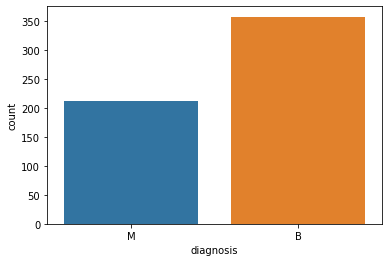

In [14]:
sns.countplot(df['diagnosis'])

Look at data types.

In [15]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

Encode the data labels (benign vs. malignant). Use LabelEncoder on col 0, where diagnosis data is. M = 1, B = 0.

In [20]:
from sklearn.preprocessing import LabelEncoder

#encode and insert back in dataframe
labelencoder_y = LabelEncoder()
df.iloc[:,0] = labelencoder_y.fit_transform(df.iloc[:,0].values)

df.iloc[:,0]


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Visualize the data using pair plots. We can see the distribution of the labeled data based on the various mean paramters.

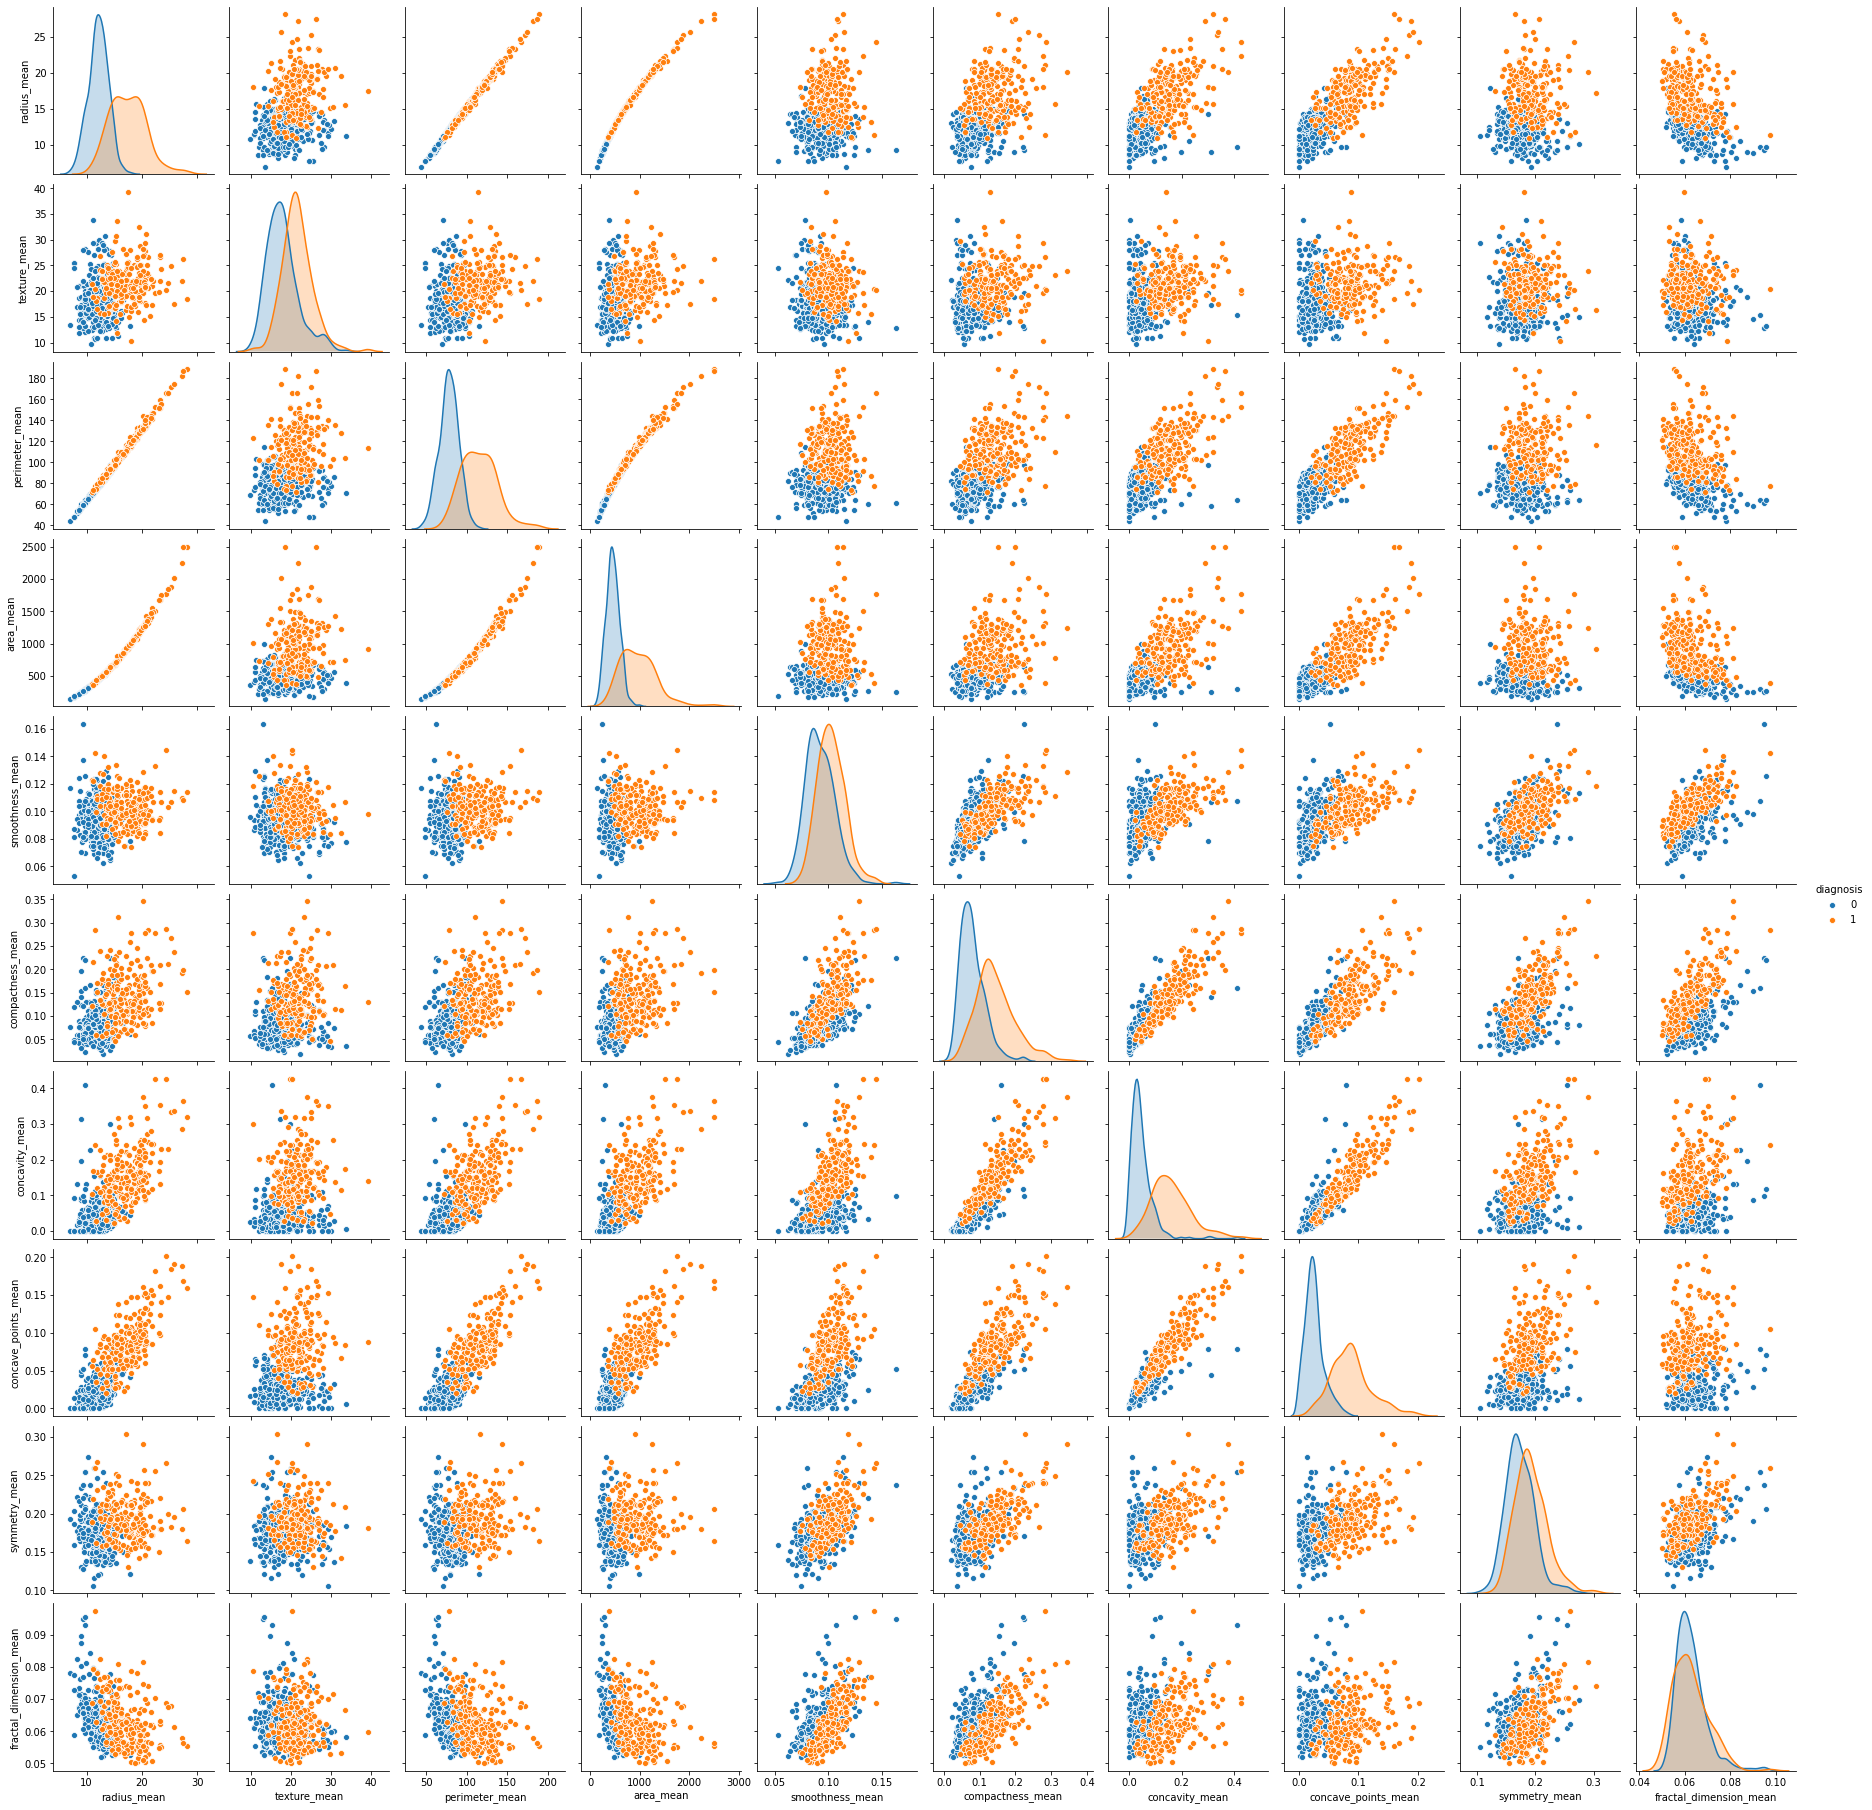

In [17]:
sns.pairplot(df.iloc[:,0:11], hue = 'diagnosis')

We can also investigate the correlation between the various paramters to see their statistical relationship.

In [ ]:
df.iloc[:,0:11].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


Import relevant deep learning libraries.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.initializers import RandomNormal, he_normal
from tensorflow.keras import optimizers
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Prepare the data for the models.

In [21]:
#separate labels from data
x_data = df.iloc[:,1:31]
y_data = df.iloc[:,0]

In [22]:
#confirm data content and shape
print(x_data.head(3))
print(y_data)

   radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758

[3 rows x 30 columns]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Split the train and test data into an 80:20 split. Split the training set further for validation data. Check the shape.

In [88]:
x_data = preprocessing.scale(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(341, 30)
(341,)
(114, 30)
(114,)
(114, 30)
(114,)


Define the deep learning model. Sequential with a signle dense layer and sigmoid activated output layer since it is binary classification. Since it's a binary classifier, we use binary_crossentropy. We can use the adam optimizer with a learning rate of 0.001. Adam is good for general purposes and we can choose a smaller learning rate since computation time is not a constraint or worry with this data.

Sigmoid seems to yield better accuracy in both training and validation than tanh activation. 

In [96]:
model = Sequential()
model.add(Dense(512, input_shape = (30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

Verbose allows us to see the progress bars per epoch. Use early_stopper to prevent overfitting.

In [97]:
#to prevent overfitting
earlystopper = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 15, verbose = 0, mode = 'auto')

#train for 100 epochs
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test), verbose = 1, 
                    callbacks = [earlystopper])

#save history
history_dict = history.history

Epoch 1/100
11/11 [==============================] - 1s 55ms/step - loss: 0.3895 - accuracy: 0.8915 - val_loss: 0.2402 - val_accuracy: 0.9386
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9384 - val_loss: 0.1657 - val_accuracy: 0.9474
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9501 - val_loss: 0.1339 - val_accuracy: 0.9561
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9736 - val_loss: 0.1174 - val_accuracy: 0.9561
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9795 - val_loss: 0.1058 - val_accuracy: 0.9649
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9853 - val_loss: 0.0959 - val_accuracy: 0.9737
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9883 - val_loss: 0.0928 - val_accuracy: 0.9737
Epoch 8/100


With our neural network, we achieve the following approximate results.

training loss = 0.0080, training accuracy = 0.9941

validation loss = 0.1270, validation accuracy = 0.9825

We can plot the loss and accuracy histories below to see the effectiveness of the solution.

Text(0.5, 1.0, 'Loss as a Function of Epochs')

<Figure size 432x288 with 0 Axes>

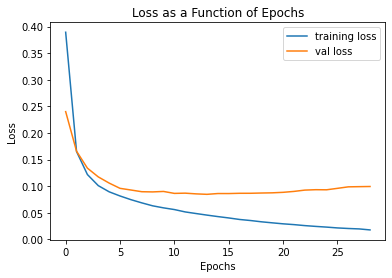

In [98]:
#plot
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure()
plt.figure()

plt.plot(train_loss, label = 'training loss')
plt.plot(val_loss, label='val loss')

#legend and labels
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss as a Function of Epochs")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Accuracy as a Function of Epochs')

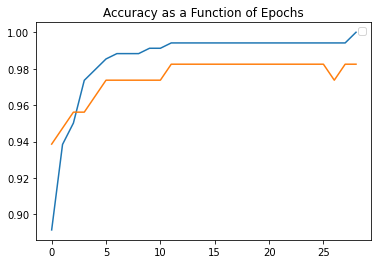

In [101]:
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.legend()

plt.plot(train_accuracy, label = 'train accuracy')
plt.plot(val_accuracy, label = 'val accuracy')
plt.title("Accuracy as a Function of Epochs")



The training and validation results seem to reach their asymptotes so we can conclude the model is trained enough.

Now we can try testing the model on the testing data it hasn't seen before.

In [102]:
loss, acc = model.evaluate(x_test, y_test)

print("Test loss: ", loss)
print("Test accuracy: ", acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9825
Test loss:  0.09935076534748077
Test accuracy:  0.9824561476707458


The results show approximately 0.982 testing accuracy.

We can further explore the evaluation of our solution by looking at the AUC and ROC curves using sklearn metrics. 

The AUC and ROC curve is an important performance measurement for classification problems.

ROC = Receiver Operating Characteristics
- ROC is a probability curve that shows the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

AUC = Area Under The Curve
- The higher the AUC, the better the model can distinguish between benign and malignant tumors. 
- The more the AUC tends toward the value 1, the model has a great measure of separability and is able to distinguish between different classes.
- An AUC of 0.5 means the model has no class separation at all. 0 means it is predicting the opposite result every time.


In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_test_pred = model.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred)

auc_keras = auc(fpr_keras, tpr_keras)
print('Test data AUC: ', auc_keras)

Test data AUC:  0.9933862433862435


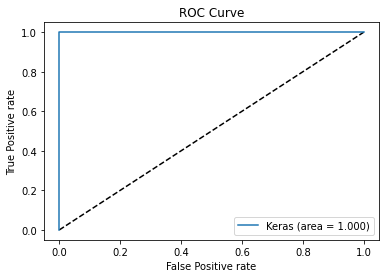

In [112]:
#test ROC AUC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')

plt.legend(loc = 'best')
plt.show()

In [113]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#training ROC AUC curve
y_train_pred = model.predict_proba(x_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)

auc_keras = auc(fpr_keras, tpr_keras)

print('Training data AUC: ', auc_keras)

Training data AUC:  1.0


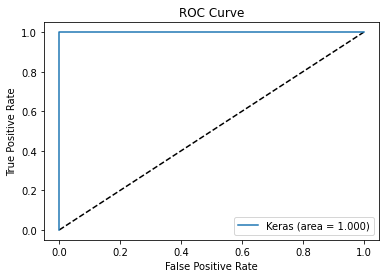

In [114]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='best')
plt.show()

We can try another deep learning model using softmax with categorical cross entropy and compare it against our previous single layer regression model.

We can also try adding more advanced techniques to optimize the model such as regularization, normalization, and dropout layers to prevent overfitting.

In [216]:
#mini-batch gradient descent with Nesterov momentum

In [ ]:
#regularization

In [ ]:
#dropout